<a href="https://colab.research.google.com/github/ABBU2712/Open-Source-Kornia/blob/main/Tutorial_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%matplotlib inline
!pip install kornia

In [2]:
import kornia
kornia.__version__

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1833: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


'0.5.4'

In [3]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [10]:
!wget -q https://github.com/kornia/data/raw/main/squirrel.jpg

In [8]:
# Read the image with OpenCV
img: np.ndarray = cv2.imread('Image.png')


In [11]:
# Read the image with OpenCV
img: np.ndarray = cv2.imread('squirrel.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
#convert image to tensor
data: torch.tensor = kornia.utils.image_to_tensor(img, keepdim=False)
data = data.float() / 255.

In [13]:
sharpen = kornia.filters.UnsharpMask((9,9), (2.5,2.5))
sharpened_tensor = sharpen(data)
difference = (sharpened_tensor - data).abs()

In [14]:
# Converting the sharpened tensor to image
sharpened_image = kornia.utils.tensor_to_image(sharpened_tensor) 
difference_image = kornia.utils.tensor_to_image(difference)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


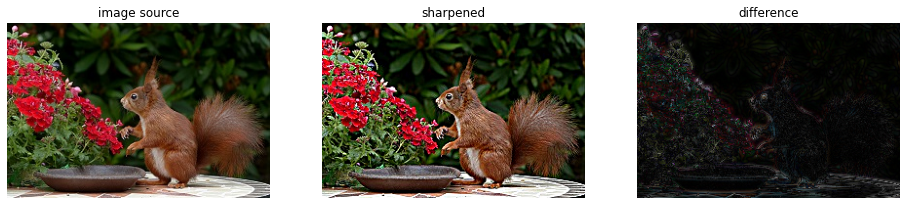

In [15]:
# To display the input image, sharpened image and the difference image
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('sharpened')
axs[1].imshow(sharpened_image)

axs[2].axis('off')
axs[2].set_title('difference')
axs[2].imshow(difference_image)
plt.show()

**First gaussian blur is added to the original image, then subtracted from it and finally the second image is added with the original one to obtain the sharpened image**